In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Creating multiple dataframe with different "look back" periods
# The periods are 1 day, 3 days. 7 days. 15 days. 30 days and 60 days
# The look back periods should be in the form of a list
# For example, if the look back period is 3, then the dataframe should have 3 columns
# Date, Close, [Close(t-1), Close(t-2), Close(t-3)]

def create_look_back_arrays(df, window_size = 1):
    df = df.drop(columns = ['Date'])
    df_as_np = df.to_numpy()
    X = []
    Y = []
    for i in range(len(df_as_np) - window_size):
        X.append(df_as_np[i:i+window_size])
        Y.append(df_as_np[i+window_size])
    return np.array(X), np.array(Y)

In [3]:
df = pd.read_csv('../Data/ethereum_data.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
1660,2022-05-27,1802.543823,1814.656494,1721.264771,1724.922852,1724.922852,25470760032
1661,2022-05-28,1724.635986,1757.941772,1724.635986,1757.941772,1757.941772,23214777872
1662,2022-05-29,1792.184448,1818.776611,1765.937378,1812.031006,1812.031006,10642556101
1663,2022-05-30,1811.885986,2005.210815,1804.456055,1996.441284,1996.441284,19580808705


In [5]:
df = df[['Date', 'Close']]
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df[['Close']])

/var/folders/76/w363ly_90ln6pf3txlrc64bw0000gn/T/ipykernel_53006/263429702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = scaler.fit_transform(df[['Close']])


In [6]:
df

,Date,Close
0,2017-11-09,0.050040
1,2017-11-10,0.045464
2,2017-11-11,0.048727
3,2017-11-12,0.047295
4,2017-11-13,0.049158
...,...,...
1660,2022-05-27,0.347016
1661,2022-05-28,0.354000
1662,2022-05-29,0.365441
1663,2022-05-30,0.404446


In [7]:
lstm_1 = load_model('Models/lstm_1.h5')
lstm_3 = load_model('Models/lstm_3.h5')
lstm_7 = load_model('Models/lstm_7.h5')
lstm_15 = load_model('Models/lstm_15.h5')
lstm_30 = load_model('Models/lstm_30.h5')
lstm_60 = load_model('Models/lstm_60.h5')

gru_1 = load_model('Models/gru_1.h5')
gru_3 = load_model('Models/gru_3.h5')
gru_7 = load_model('Models/gru_7.h5')
gru_15 = load_model('Models/gru_15.h5')
gru_30 = load_model('Models/gru_30.h5')
gru_60 = load_model('Models/gru_60.h5')

In [8]:
# creating a look back window of 60 days 
X, y = create_look_back_arrays(df, 60)

In [9]:
X.shape, y.shape

((1605, 60, 1), (1605, 1))

In [10]:
lstm_1_predictions = []
lstm_3_predictions = []
lstm_7_predictions = []
lstm_15_predictions = []
lstm_30_predictions = []
lstm_60_predictions = []

gru_1_predictions = []
gru_3_predictions = []
gru_7_predictions = []
gru_15_predictions = []
gru_30_predictions = []
gru_60_predictions = []

In [11]:
X.shape

(1605, 60, 1)

In [12]:
X[0], y[0]

(array([[0.0500395 ],
        [0.0454642 ],
        [0.04872747],
        [0.04729487],
        [0.0491579 ],
        [0.05358176],
        [0.05267774],
        [0.05216312],
        [0.05247405],
        [0.05569289],
        [0.0571257 ],
        [0.05973666],
        [0.05839797],
        [0.06268138],
        [0.06892405],
        [0.08261865],
        [0.08079221],
        [0.0818612 ],
        [0.08377014],
        [0.08219371],
        [0.07259534],
        [0.07673914],
        [0.08084805],
        [0.08019425],
        [0.08070273],
        [0.08162304],
        [0.08015872],
        [0.0728206 ],
        [0.07405162],
        [0.07862523],
        [0.08232062],
        [0.07559844],
        [0.09112687],
        [0.11995542],
        [0.1308138 ],
        [0.12934354],
        [0.12693903],
        [0.12942667],
        [0.13445355],
        [0.15024744],
        [0.15705359],
        [0.1554171 ],
        [0.15583526],
        [0.12491102],
        [0.13432919],
        [0

In [13]:
X[0][-1].reshape(1, 1)

array([[0.22608115]])

In [14]:
lstm_1.predict(X[0][-1].reshape(1, 1, 1)), y[0]

1/1 [==============================] - 0s 154ms/step


(array([[0.22789796]], dtype=float32), array([0.22509972]))

In [15]:
scaler.inverse_transform(lstm_1.predict(X[0][-1].reshape(1, 1, 1)))

1/1 [==============================] - 0s 9ms/step


array([[1161.7595]], dtype=float32)

In [16]:
scaler.inverse_transform(y[0].reshape(1, 1))

array([[1148.5300293]])

In [17]:
X[0], X[0, -3:, -1].reshape(-1, 3, 1)

(array([[0.0500395 ],
        [0.0454642 ],
        [0.04872747],
        [0.04729487],
        [0.0491579 ],
        [0.05358176],
        [0.05267774],
        [0.05216312],
        [0.05247405],
        [0.05569289],
        [0.0571257 ],
        [0.05973666],
        [0.05839797],
        [0.06268138],
        [0.06892405],
        [0.08261865],
        [0.08079221],
        [0.0818612 ],
        [0.08377014],
        [0.08219371],
        [0.07259534],
        [0.07673914],
        [0.08084805],
        [0.08019425],
        [0.08070273],
        [0.08162304],
        [0.08015872],
        [0.0728206 ],
        [0.07405162],
        [0.07862523],
        [0.08232062],
        [0.07559844],
        [0.09112687],
        [0.11995542],
        [0.1308138 ],
        [0.12934354],
        [0.12693903],
        [0.12942667],
        [0.13445355],
        [0.15024744],
        [0.15705359],
        [0.1554171 ],
        [0.15583526],
        [0.12491102],
        [0.13432919],
        [0

In [18]:
# Creating the list of X for each model.
# Since all the models predict the next day's closing price and have differnet look back windows,
# we'll use the 60 day look back window and extract the look back window for each model
# For example, in the 60 day look back window, if we want to use the 3 day model, we'll use the last 3 days

# Extracting the different look back windows for each model
one_day_window = X[:, -1, -1].reshape(-1, 1, 1)
three_day_window = X[:, -3:, -1].reshape(-1, 3, 1)
seven_day_window = X[:, -7:, -1].reshape(-1, 7, 1)
fifteen_day_window = X[:, -15:, -1].reshape(-1, 15, 1)
thirty_day_window = X[:, -30:, -1].reshape(-1, 30, 1)
sixty_day_window = X[:, :, -1].reshape(-1, 60, 1)

In [19]:
# Predict the prices through the model now
lstm_1_predictions = scaler.inverse_transform(lstm_1.predict(one_day_window))
lstm_3_predictions = scaler.inverse_transform(lstm_3.predict(three_day_window))
lstm_7_predictions = scaler.inverse_transform(lstm_7.predict(seven_day_window))
lstm_15_predictions = scaler.inverse_transform(lstm_15.predict(fifteen_day_window))
lstm_30_predictions = scaler.inverse_transform(lstm_30.predict(thirty_day_window))
lstm_60_predictions = scaler.inverse_transform(lstm_60.predict(sixty_day_window))

gru_1_predictions = scaler.inverse_transform(gru_1.predict(one_day_window))
gru_3_predictions = scaler.inverse_transform(gru_3.predict(three_day_window))
gru_7_predictions = scaler.inverse_transform(gru_7.predict(seven_day_window))
gru_15_predictions = scaler.inverse_transform(gru_15.predict(fifteen_day_window))
gru_30_predictions = scaler.inverse_transform(gru_30.predict(thirty_day_window))
gru_60_predictions = scaler.inverse_transform(gru_60.predict(sixty_day_window))

51/51 [==============================] - 0s 3ms/step


In [20]:
lstm_1_predictions.shape, lstm_3_predictions.shape, lstm_7_predictions.shape, lstm_15_predictions.shape, lstm_30_predictions.shape, lstm_60_predictions.shape

((1605, 1), (1605, 1), (1605, 1), (1605, 1), (1605, 1), (1605, 1))

In [21]:
gru_1_predictions.shape, gru_3_predictions.shape, gru_7_predictions.shape, gru_15_predictions.shape, gru_30_predictions.shape, gru_60_predictions.shape

((1605, 1), (1605, 1), (1605, 1), (1605, 1), (1605, 1), (1605, 1))

In [22]:
y.shape

(1605, 1)

In [23]:
# Creating a dataframe with all the predictions and the actual values
predictions_df = pd.DataFrame({'Actual': scaler.inverse_transform(y.reshape(-1, 1)).reshape(-1), 
                               'LSTM_1': lstm_1_predictions.reshape(-1), 
                               'LSTM_3': lstm_3_predictions.reshape(-1),
                               'LSTM_7': lstm_7_predictions.reshape(-1),
                               'LSTM_15': lstm_15_predictions.reshape(-1),
                               'LSTM_30': lstm_30_predictions.reshape(-1),
                               'LSTM_60': lstm_60_predictions.reshape(-1),
                               'GRU_1': gru_1_predictions.reshape(-1),
                               'GRU_3': gru_3_predictions.reshape(-1),
                               'GRU_7': gru_7_predictions.reshape(-1),
                               'GRU_15': gru_15_predictions.reshape(-1),
                               'GRU_30': gru_30_predictions.reshape(-1),
                               'GRU_60': gru_60_predictions.reshape(-1)}, index = df['Date'][60:])

In [24]:
predictions_df

,Actual,LSTM_1,LSTM_3,LSTM_7,LSTM_15,LSTM_30,LSTM_60,GRU_1,GRU_3,GRU_7,GRU_15,GRU_30,GRU_60
Date,,,,,,,,,,,,,
2018-01-08,1148.530029,1161.759521,1071.796143,1017.247742,969.863892,1093.694214,1099.476440,1159.821045,1110.332520,1130.182129,1139.590454,1145.680542,1142.281860
2018-01-09,1299.739990,1157.039185,1122.892944,1068.640015,1011.140869,1141.318970,1145.764404,1155.116333,1150.045776,1164.790894,1173.355103,1177.904419,1182.993652
2018-01-10,1255.819946,1311.212524,1211.526611,1132.890747,1067.676636,1221.959229,1227.710571,1308.515259,1248.896118,1265.731934,1281.299805,1286.055542,1279.786133
2018-01-11,1154.930054,1266.357056,1247.397705,1179.582275,1113.779419,1267.893311,1270.730835,1263.941162,1271.525635,1287.727783,1298.712036,1301.375122,1310.651978
2018-01-12,1273.199951,1163.550049,1241.598145,1200.916138,1141.187378,1270.636230,1262.381348,1161.605347,1228.712891,1236.851196,1233.921509,1236.316895,1267.225708
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,1724.922852,1830.385132,1949.977783,2014.282715,2041.163086,2059.175781,2017.099121,1821.186035,1908.433594,1908.641968,1881.381714,1884.482056,1929.625732
2022-05-28,1757.941772,1748.536133,1857.481934,1966.924927,2002.433716,1985.399536,1929.161377,1740.751709,1815.886230,1819.077148,1783.115845,1788.256104,1834.468384
2022-05-29,1812.031006,1782.727417,1795.949707,1926.075806,1971.042114,1941.320068,1881.765015,1774.369263,1786.372192,1802.065063,1771.786255,1779.740723,1809.937378


# Machine Learning Models

In [25]:
scaler = MinMaxScaler()
predictions_df['Actual'] = scaler.fit_transform(predictions_df[['Actual']])
predictions_df['LSTM_1'] = scaler.fit_transform(predictions_df[['LSTM_1']])
predictions_df['LSTM_3'] = scaler.fit_transform(predictions_df[['LSTM_3']])
predictions_df['LSTM_7'] = scaler.fit_transform(predictions_df[['LSTM_7']])
predictions_df['LSTM_15'] = scaler.fit_transform(predictions_df[['LSTM_15']])
predictions_df['LSTM_30'] = scaler.fit_transform(predictions_df[['LSTM_30']])
predictions_df['LSTM_60'] = scaler.fit_transform(predictions_df[['LSTM_60']])
predictions_df['GRU_1'] = scaler.fit_transform(predictions_df[['GRU_1']])
predictions_df['GRU_3'] = scaler.fit_transform(predictions_df[['GRU_3']])
predictions_df['GRU_7'] = scaler.fit_transform(predictions_df[['GRU_7']])
predictions_df['GRU_15'] = scaler.fit_transform(predictions_df[['GRU_15']])
predictions_df['GRU_30'] = scaler.fit_transform(predictions_df[['GRU_30']])
predictions_df['GRU_60'] = scaler.fit_transform(predictions_df[['GRU_60']])

# predictions_df = predictions_df[['Actual', 'LSTM_1', 'GRU_60']]

In [26]:
predictions_df

,Actual,LSTM_1,LSTM_3,LSTM_7,LSTM_15,LSTM_30,LSTM_60,GRU_1,GRU_3,GRU_7,GRU_15,GRU_30,GRU_60
Date,,,,,,,,,,,,,
2018-01-08,0.225100,0.234256,0.223907,0.212832,0.202770,0.249319,0.221678,0.244632,0.225263,0.227450,0.231058,0.230498,0.230241
2018-01-09,0.257083,0.233221,0.235610,0.224556,0.212529,0.261412,0.231897,0.243565,0.234039,0.234983,0.238352,0.237497,0.239194
2018-01-10,0.247793,0.267030,0.255910,0.239213,0.225897,0.281887,0.249987,0.278357,0.255883,0.256954,0.261670,0.260988,0.260480
2018-01-11,0.226453,0.257193,0.264126,0.249865,0.236797,0.293550,0.259485,0.268247,0.260883,0.261742,0.265431,0.264315,0.267268
2018-01-12,0.251469,0.234649,0.262798,0.254732,0.243278,0.294246,0.257641,0.245037,0.251423,0.250668,0.251435,0.250184,0.257718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,0.347016,0.380877,0.425045,0.440281,0.456069,0.494462,0.424256,0.394637,0.401629,0.396893,0.391296,0.390966,0.403389
2022-05-28,0.354000,0.362929,0.403859,0.429478,0.446911,0.475729,0.404843,0.376393,0.381177,0.377398,0.370069,0.370066,0.382463
2022-05-29,0.365441,0.370427,0.389766,0.420159,0.439489,0.464537,0.394379,0.384018,0.374655,0.373695,0.367622,0.368216,0.377068


In [27]:
meta_training_X =  predictions_df.iloc[:int(len(predictions_df) * 0.9)].drop(columns = ['Actual'])
meta_training_y = predictions_df.iloc[:int(len(predictions_df) * 0.9)]['Actual']

meta_testing_X = predictions_df.iloc[int(len(predictions_df) * 0.9):].drop(columns = ['Actual'])
meta_testing_y = predictions_df.iloc[int(len(predictions_df) * 0.9):]['Actual']

In [28]:
meta_training_X.shape, meta_training_y.shape, meta_testing_X.shape, meta_testing_y.shape

((1444, 12), (1444,), (161, 12), (161,))

In [29]:
meta_training_X

,LSTM_1,LSTM_3,LSTM_7,LSTM_15,LSTM_30,LSTM_60,GRU_1,GRU_3,GRU_7,GRU_15,GRU_30,GRU_60
Date,,,,,,,,,,,,
2018-01-08,0.234256,0.223907,0.212832,0.202770,0.249319,0.221678,0.244632,0.225263,0.227450,0.231058,0.230498,0.230241
2018-01-09,0.233221,0.235610,0.224556,0.212529,0.261412,0.231897,0.243565,0.234039,0.234983,0.238352,0.237497,0.239194
2018-01-10,0.267030,0.255910,0.239213,0.225897,0.281887,0.249987,0.278357,0.255883,0.256954,0.261670,0.260988,0.260480
2018-01-11,0.257193,0.264126,0.249865,0.236797,0.293550,0.259485,0.268247,0.260883,0.261742,0.265431,0.264315,0.267268
2018-01-12,0.234649,0.262798,0.254732,0.243278,0.294246,0.257641,0.245037,0.251423,0.250668,0.251435,0.250184,0.257718
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-17,0.829221,0.853704,0.864026,0.886558,0.885251,0.828606,0.854747,0.842779,0.838454,0.831988,0.830652,0.829481
2021-12-18,0.812698,0.867471,0.861621,0.882073,0.886823,0.828955,0.840120,0.840547,0.827733,0.819807,0.817845,0.821759
2021-12-19,0.828900,0.862815,0.861988,0.880735,0.896669,0.838721,0.854463,0.841777,0.836054,0.828833,0.827364,0.827873


In [30]:
# The entire row is the input for the meta model
# reshape the input to be 3D [length, 12, 1]
meta_training_X = meta_training_X.to_numpy().reshape(-1, 12)
meta_testing_X = meta_testing_X.to_numpy().reshape(-1, 12)

meta_training_X.shape, meta_testing_X.shape

((1444, 12), (161, 12))

In [31]:
meta_training_X[0]

array([0.23425648, 0.22390668, 0.21283217, 0.20276982, 0.24931937,
       0.2216779 , 0.24463186, 0.2252626 , 0.2274497 , 0.2310583 ,
       0.230498  , 0.23024121], dtype=float32)

In [32]:
meta_training_y = meta_training_y.to_numpy().reshape(-1, 1)
meta_testing_y = meta_testing_y.to_numpy().reshape(-1, 1)

meta_training_y.shape, meta_testing_y.shape

((1444, 1), (161, 1))

In [33]:
meta_training_y[0]

array([0.22509972])

In [34]:
meta_model_LR = LinearRegression()
meta_model_RFR = RandomForestRegressor()
meta_model_SVR = SVR()
meta_model_KNN = KNeighborsRegressor()

meta_model_LR.fit(meta_training_X, meta_training_y)
meta_model_RFR.fit(meta_training_X, meta_training_y)
meta_model_SVR.fit(meta_training_X, meta_training_y)
meta_model_KNN.fit(meta_training_X, meta_training_y)

test_results = pd.DataFrame()
test_results['Actual'] = meta_testing_y.reshape(-1)
test_results['Predicted_LR'] = meta_model_LR.predict(meta_testing_X)
test_results['Predicted_RFR'] = meta_model_RFR.predict(meta_testing_X)
test_results['Predicted_SVR'] = meta_model_SVR.predict(meta_testing_X)
test_results['Predicted_KNN'] = meta_model_KNN.predict(meta_testing_X)

/var/folders/76/w363ly_90ln6pf3txlrc64bw0000gn/T/ipykernel_53006/1615355309.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  meta_model_RFR.fit(meta_training_X, meta_training_y)
/opt/miniconda3/envs/eth/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
# unscale the data to get the actual values
test_results['Actual'] = scaler.inverse_transform(test_results[['Actual']])
test_results['Predicted_LR'] = scaler.inverse_transform(test_results[['Predicted_LR']])
test_results['Predicted_RFR'] = scaler.inverse_transform(test_results[['Predicted_RFR']])
test_results['Predicted_SVR'] = scaler.inverse_transform(test_results[['Predicted_SVR']])
test_results['Predicted_KNN'] = scaler.inverse_transform(test_results[['Predicted_KNN']])

In [36]:
test_results

,Actual,Predicted_LR,Predicted_RFR,Predicted_SVR,Predicted_KNN
0,3844.259851,3883.706787,3805.441571,3771.380114,3801.167773
1,3965.367221,3859.344238,3806.057942,3764.581224,3801.167773
2,3907.627114,3964.388916,3829.749492,3857.992564,3958.032475
3,3951.195307,3924.281982,3990.078580,3838.877746,4002.852102
4,3926.233548,3946.439941,4065.884781,3865.972274,3957.787138
...,...,...,...,...,...
156,1673.283113,1790.616089,1759.923456,1999.149346,1805.465183
157,1705.041064,1703.343018,1755.987404,1931.507125,1743.523142
158,1757.064667,1716.080811,1721.553015,1915.338351,1776.467624
159,1934.432444,1761.741333,1759.398989,1931.709926,1724.845911


In [37]:
print("Linear Regression: ", meta_model_LR.score(meta_testing_X, meta_testing_y))
print("Random Forest Regressor: ", meta_model_RFR.score(meta_testing_X, meta_testing_y))
print("Support Vector Regressor: ", meta_model_SVR.score(meta_testing_X, meta_testing_y))
print("K Nearest Neighbors: ", meta_model_KNN.score(meta_testing_X, meta_testing_y))

Linear Regression:  0.945506357710241
Random Forest Regressor:  0.9131726044810607
Support Vector Regressor:  0.9220573875526457
K Nearest Neighbors:  0.9112064311627789


In [38]:
test_results.index = df[60:]['Date'][int(len(predictions_df) * 0.9):].to_list()

In [39]:
test_results

,Actual,Predicted_LR,Predicted_RFR,Predicted_SVR,Predicted_KNN
2021-12-22,3844.259851,3883.706787,3805.441571,3771.380114,3801.167773
2021-12-23,3965.367221,3859.344238,3806.057942,3764.581224,3801.167773
2021-12-24,3907.627114,3964.388916,3829.749492,3857.992564,3958.032475
2021-12-25,3951.195307,3924.281982,3990.078580,3838.877746,4002.852102
2021-12-26,3926.233548,3946.439941,4065.884781,3865.972274,3957.787138
...,...,...,...,...,...
2022-05-27,1673.283113,1790.616089,1759.923456,1999.149346,1805.465183
2022-05-28,1705.041064,1703.343018,1755.987404,1931.507125,1743.523142
2022-05-29,1757.064667,1716.080811,1721.553015,1915.338351,1776.467624
2022-05-30,1934.432444,1761.741333,1759.398989,1931.709926,1724.845911


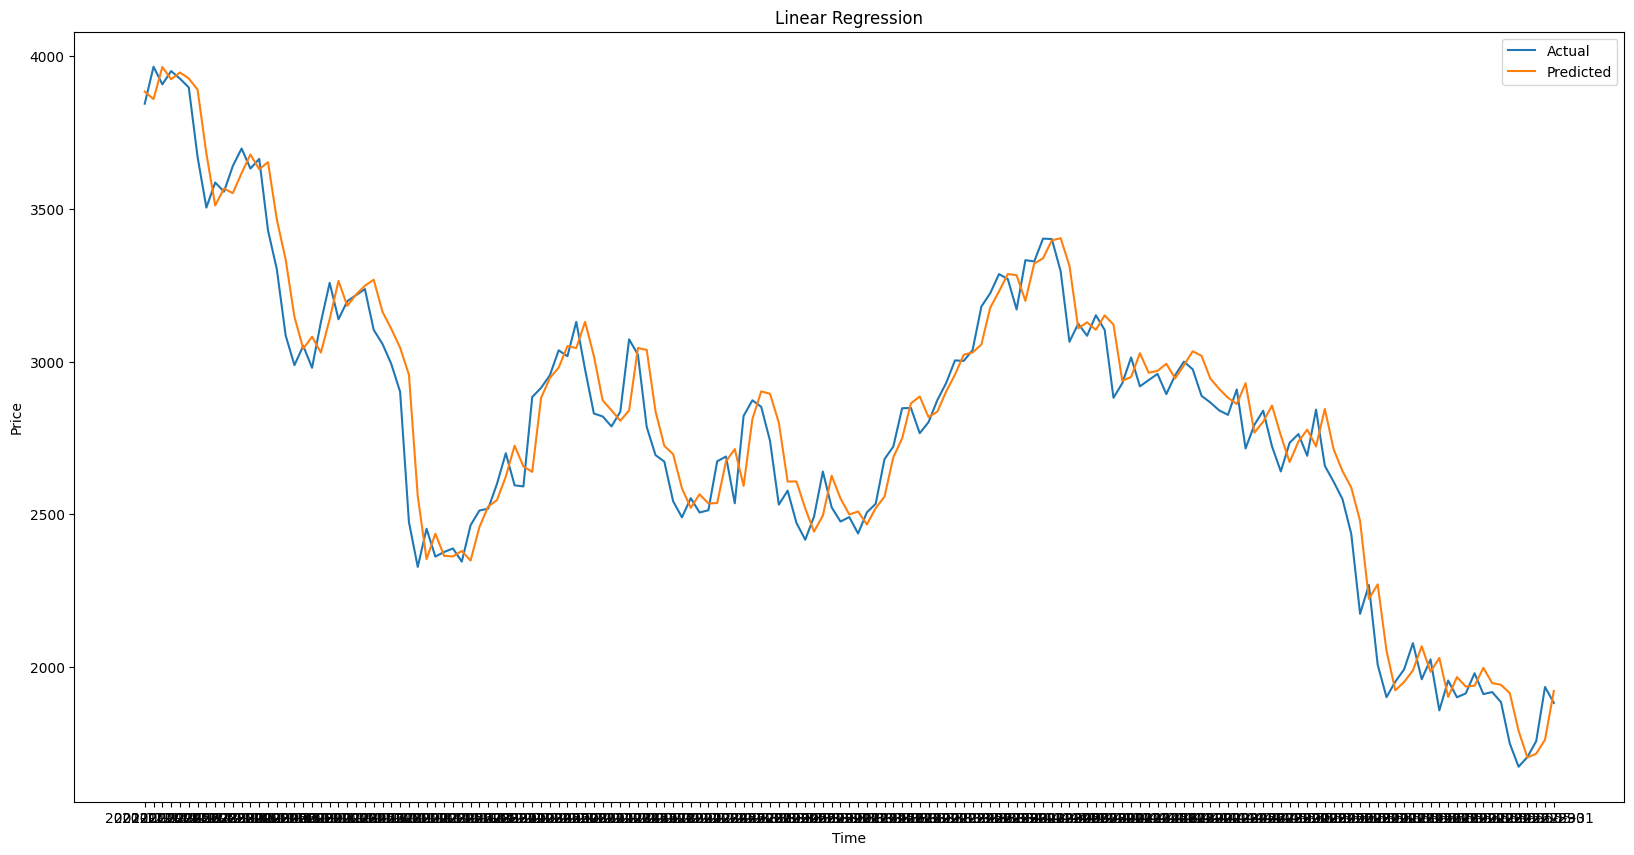

In [40]:
# Show 4 plots, one for each model and the actual values
# Then a final plot with all the models and the actual values

plt.figure(figsize = (20, 10))
plt.plot(test_results['Actual'], label = 'Actual')
plt.plot(test_results['Predicted_LR'], label = 'Predicted')
plt.title('Linear Regression')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

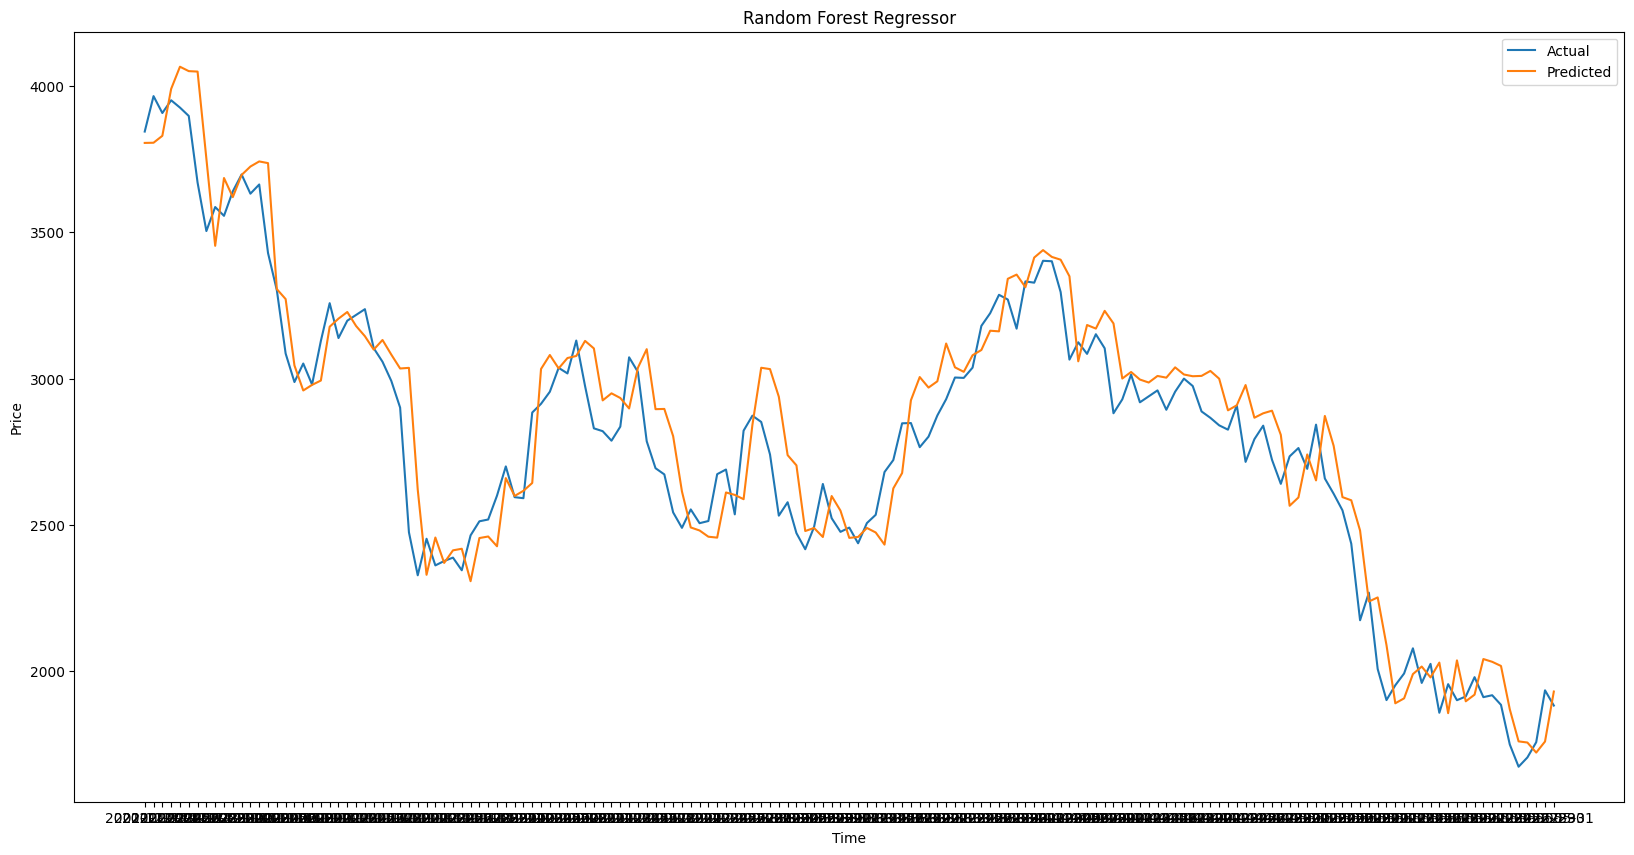

In [41]:
plt.figure(figsize = (20, 10))
plt.plot(test_results['Actual'], label = 'Actual')
plt.plot(test_results['Predicted_RFR'], label = 'Predicted')
plt.title('Random Forest Regressor')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

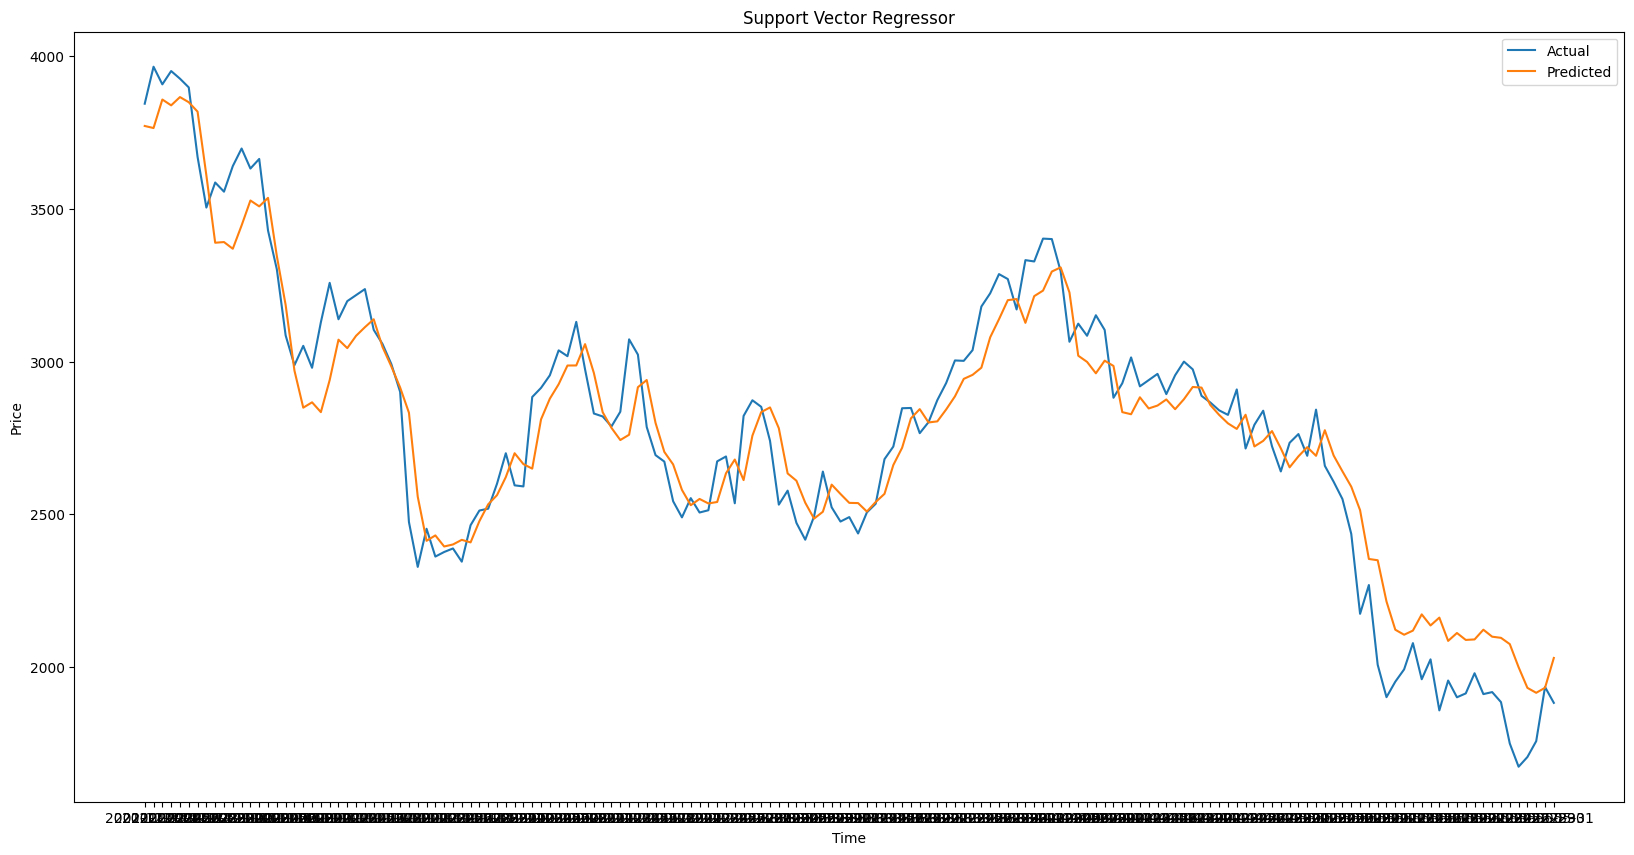

In [42]:
plt.figure(figsize = (20, 10))
plt.plot(test_results['Actual'], label = 'Actual')
plt.plot(test_results['Predicted_SVR'], label = 'Predicted')
plt.title('Support Vector Regressor')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

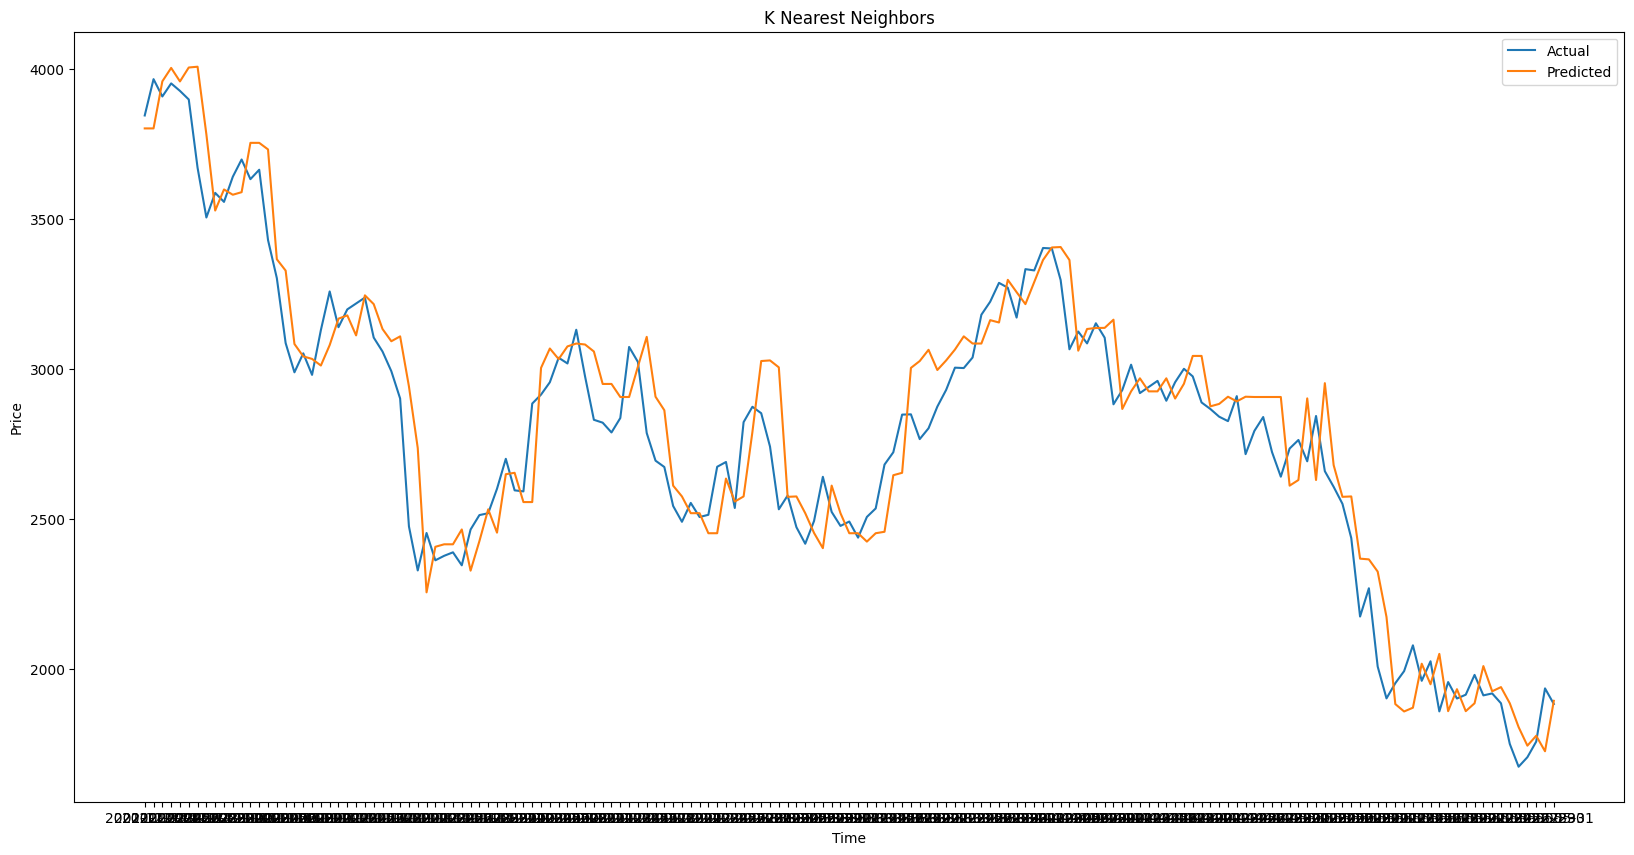

In [43]:
plt.figure(figsize = (20, 10))
plt.plot(test_results['Actual'], label = 'Actual')
plt.plot(test_results['Predicted_KNN'], label = 'Predicted')
plt.title('K Nearest Neighbors')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [44]:
# Calculating the root mean squared error and mean absolute error for each model

print("Linear Regression")
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(test_results['Actual'], test_results['Predicted_LR'])))
print("Mean Absolute Error: ", mean_absolute_error(test_results['Actual'], test_results['Predicted_LR']))

print("Random Forest Regressor")
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(test_results['Actual'], test_results['Predicted_RFR'])))
print("Mean Absolute Error: ", mean_absolute_error(test_results['Actual'], test_results['Predicted_RFR']))

print("Support Vector Regressor")
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(test_results['Actual'], test_results['Predicted_SVR'])))
print("Mean Absolute Error: ", mean_absolute_error(test_results['Actual'], test_results['Predicted_SVR']))

print("K Nearest Neighbors")
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(test_results['Actual'], test_results['Predicted_KNN'])))
print("Mean Absolute Error: ", mean_absolute_error(test_results['Actual'], test_results['Predicted_KNN']))

Linear Regression
Root Mean Squared Error:  116.34491526381174
Mean Absolute Error:  88.77447222538375
Random Forest Regressor
Root Mean Squared Error:  146.85976512839946
Mean Absolute Error:  114.87710183992867
Support Vector Regressor
Root Mean Squared Error:  139.14317897310312
Mean Absolute Error:  112.85513224213143
K Nearest Neighbors
Root Mean Squared Error:  148.51324864010667
Mean Absolute Error:  114.72441964322628
